## LDA on full data set using the Gensim Library
In this section of the notebook we will explore the topic that the politician in denmark talk about. As Pyro is to slow too slow in terms of handeling the full dataset we have utilied the Library Gensim. We have assumed that 25 topics exists in the dataset - note in praxis it is a difficult task to determine the appropriate number of topics - it usualy requires domain knowledge. 

More information about the Gensim Library can be found at https://radimrehurek.com/gensim/.

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import LdaModel
from gensim import corpora, similarities

from src.features.build_features import  vocabulary, X, X_tfidf, corpus, corpus_tfidf

The model can easily be trained using *LdaModel* from gensim. Note it will take approximately 10 minutes to run the script. 
(still far less than the Pyro model)

In [130]:
# Flip vocabulary dictionary so that the format fit gensim
id2word = {v:k for v, k in sorted((value, key) for (key,value) in vocabulary.items())}

# Set training parameters.
num_topics = 25
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Train LDA model.
model = LdaModel(
    corpus=corpus_tfidf,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [133]:
# model.save("../gensim_lda_model.model")
model = LdaModel.load("../models/gensim_lda_model.model")
top_topics = model.top_topics(corpus, topn=50)

The cell below generate a 5 by 5 grid with wordclouds each cloud corrosponds to one of the 25 topics. The importance of the word within the topic are a shown by the size of the word. Larger words meeans more importance for that topic. 

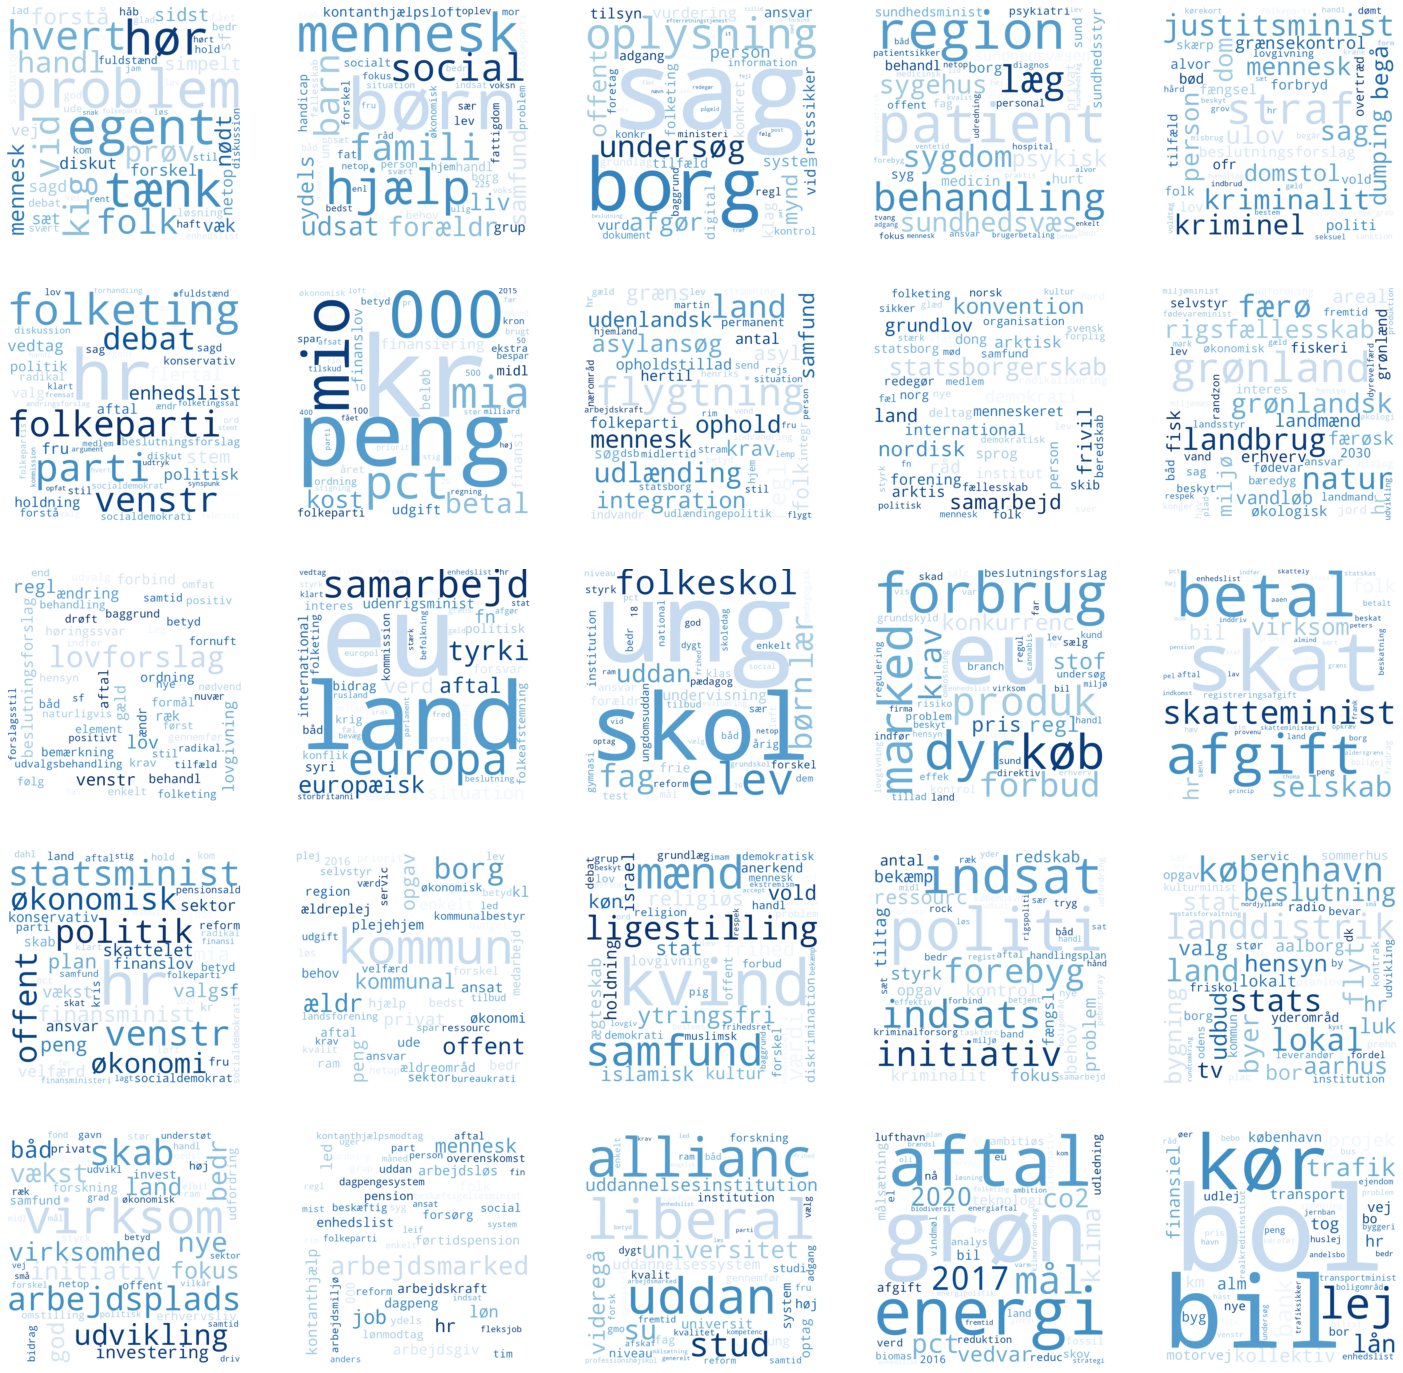

In [135]:
rows, cols = np.meshgrid(
    np.arange(5),
    np.arange(5)
)

rows = rows.flatten()
cols = cols.flatten()

f, axarr = plt.subplots(5,5, figsize=(25,25))

for i in range(25):
    word_frec = {word : weight for weight, word in top_topics[i][0]}

    wc = WordCloud( colormap='Blues',  
            background_color='white', 
            random_state=2,             
            width = 1000, 
            height=  1000 )
    wc.generate_from_frequencies(word_frec)

    axarr[rows[i],cols[i]].imshow(wc, interpolation='bilinear')
    axarr[rows[i],cols[i]].axis('off')
plt.show()

With a bit of knowledge of the Danish language it is clear that model actually finds some topic we as humans would consider topics - but also some of the topics just denote the langauge that politicians use in the parlament. Furthermore it seems that some components contains more than what we as human would consider one topic. Perhaps some of this could be caputured by adding additional topics components. 